In [ ]:
%pip install faker
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Define the team members
team_members = [
    {"id": "TM001", "name": "John Smith", "role": "Team Leader"},
    {"id": "TM002", "name": "John Doe", "role": "Telemarketer"},
    {"id": "TM003", "name": "Jane Smith", "role": "Telemarketer"},
    {"id": "TM004", "name": "Jane Doe", "role": "Telemarketer"},
    {"id": "TM005", "name": "Robert Jones", "role": "Telemarketer"},
    {"id": "TM006", "name": "Emma Jones", "role": "Telemarketer"},
    {"id": "TM007", "name": "Jane Johnson", "role": "Telemarketer"},
    {"id": "TM008", "name": "James Johnson", "role": "Telemarketer"},
    {"id": "TM009", "name": "Carlos Garcia", "role": "Telemarketer"},
    {"id": "TM010", "name": "Anna Martin", "role": "Telemarketer"},
]

# States (Location) and their lead distribution (primarily north central PA, Montana, Washington, Idaho, Alaska)
states = {
    "PA": ["17701", "17834", "16801", "17752"], # North Central PA zip codes for realism
    "MT": ["59001", "59101", "59601"],
    "WA": ["98001", "98101", "99201"],
    "ID": ["83701", "83814", "83201"],
    "AK": ["99501", "99701", "99801"],
}

# Define disposition probabilities (The KPIs)
disposition_probabilities = {
    "Voicemail": 0.4,
    "Call Back": 0.2,
    "Not Interested": 0.15,
    "Already Has Solar": 0.05,
    "Requested Do Not Call": 0.05,
    "Moving": 0.03,
    "Disqualified - Credit Score": 0.03,
    "Disqualified - Roof Size": 0.02,
    "Demonstration Completed": 0.05, # Higher probability for demos
    "Sold": 0.02 # Lowest probability for sold
}

# Generate lead data
leads_data = []
call_data = []

# Team Leader (TM001) - highest calls and sales
num_calls_leader = random.randint(120, 150) # More calls for the leader
for _ in range(num_calls_leader):
    lead_id = fake.uuid4()
    lead_name = fake.name()
    lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}" # Fake number with 555 prefix
    state_code = random.choice(list(states.keys()))
    zip_code = random.choice(states[state_code])
    disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())) # Weighted random choice for disposition

    leads_data.append({
        "lead_id": lead_id,
        "name": lead_name,
        "phone_number": lead_phone,
        "state_code": state_code,
        "zip_code": zip_code,
    })

    call_data.append({
        "call_id": fake.uuid4(),
        "lead_id": lead_id,
        "team_member_id": "TM001",
        "call_timestamp": fake.date_time_this_month(),
        "disposition": disposition,
    })

# Other team members (TM002-TM010)
for team_member in team_members[1:]:
    num_calls = random.randint(50, 150) # Random calls for other members

    # Special case for the fluke/random occurrence
    if team_member["id"] == "TM009": # Example: Assign to TM009
        num_calls = 80
        fluke_sales = 3
        fluke_demos = fluke_sales + random.randint(2, 5)  # More demos for fluke sales

        # Add fluke sales and demos to disposition probabilities for this member
        fluke_dispositions = []
        for _ in range(fluke_demos):
            fluke_dispositions.append("Demonstration Completed")
        for _ in range(fluke_sales):
            fluke_dispositions.append("Sold")

        # Fill the remaining calls with other dispositions
        remaining_calls = num_calls - len(fluke_dispositions)
        for _ in range(remaining_calls):
            fluke_dispositions.append(np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())))
        random.shuffle(fluke_dispositions)

        for disposition in fluke_dispositions:
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })

    else: # Normal processing for other team members
        for _ in range(num_calls):
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])
            disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values()))

            # Ensure a reasonable number of demos before a sale
            if disposition == "Sold":
                # Ensure at least 2 demos precede a sale, or adjust as desired
                num_demos_before_sale = random.randint(2, 5)
                for _ in range(num_demos_before_sale):
                    call_data.append({
                        "call_id": fake.uuid4(),
                        "lead_id": lead_id,
                        "team_member_id": team_member["id"],
                        "call_timestamp": fake.date_time_this_month(),
                        "disposition": "Demonstration Completed",
                    })

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })


# Create DataFrames
leads_df = pd.DataFrame(leads_data)
calls_df = pd.DataFrame(call_data)
team_members_df = pd.DataFrame(team_members)

# Add foreign keys to calls_df and leads_df (already incorporated during data generation)
# Primary keys: leads_df - lead_id, team_members_df - id, calls_df - call_id

# Display sample data
print("Leads DataFrame:")
print(leads_df.head())
print("\nCalls DataFrame:")
print(calls_df.head())
print("\nTeam Members DataFrame:")
print(team_members_df.head())

# Optional: You can export these DataFrames to CSV or other formats for BigQuery/HubSpot integration
# leads_df.to_csv("leads.csv", index=False)
# calls_df.to_csv("calls.csv", index=False)
# team_members_df.to_csv("team_members.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00
Leads DataFrame:
                                lead_id                name  phone_number  \
0  018ada5f-5c63-48b3-862c-4f1883630da3    Thomas Henderson  555-994-9723   
1  25854ada-0af4-49e2-a713-6c9aa476ebaa        Carl Johnson  555-776-7731   
2  075ebfb8-3421-4dfa-8a57-0280ea23b134     Dr. Mary Graves  555-269-6615   
3  ef72f432-bfd1-41fb-9ac8-00bdbaf3e320  Rachel Richards MD  555-275-1633   
4  ff5e024d-6a56-4869-b3eb-ed89318987e4   Mrs. Maria Grimes  555-520-1254   

  state_code zip_code  
0         MT    59101  
1         ID    83814  
2         AK    99501  
3         PA    16801  
4         MT    59001  

Calls DataFrame:
                                call_id                               lead_id  \
0  4ae88879-080f-4d81-81d1-fdb4ee5d6b46  018ada5f-5c63-48b3-862c-4f1883630da3   
1  2a08f497-9702-41a5-96f7-c630d4a16793  25854ada-0af4-49e2-a713-6c9aa476ebaa   
2  8f6d19a8-310b-4d3f-b5ea-bcf264783bf

In [ ]:
%pip install faker

In [ ]:
disposition_counts = calls_df.groupby('disposition').size()
display(disposition_counts)

,0
disposition,
Already Has Solar,43
Call Back,169
Demonstration Completed,81
Disqualified - Credit Score,33
Disqualified - Roof Size,18
Moving,27
Not Interested,140
Requested Do Not Call,60
Sold,18


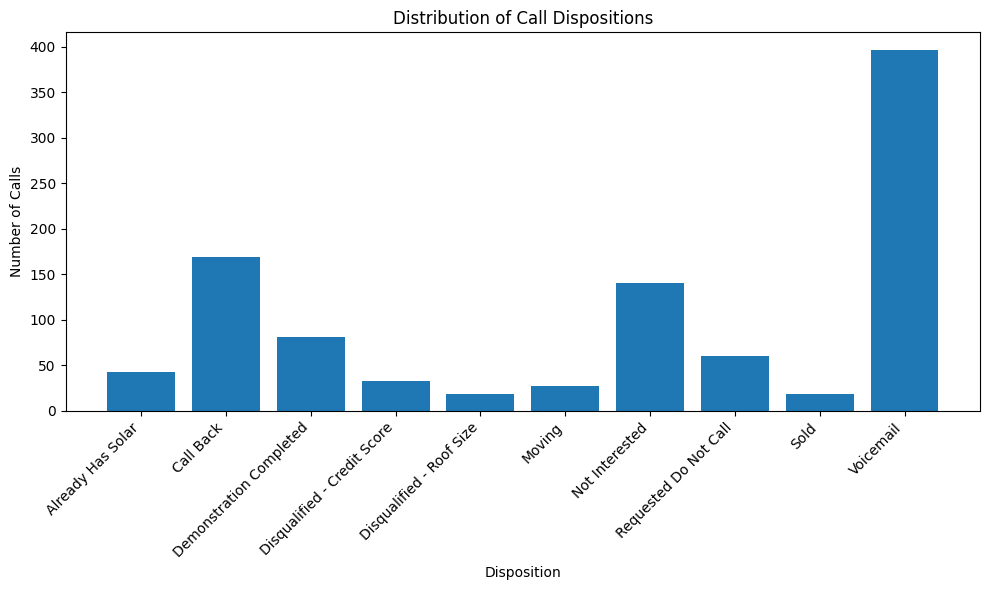

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(disposition_counts.index, disposition_counts.values)
plt.title("Distribution of Call Dispositions")
plt.xlabel("Disposition")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
merged_df = pd.merge(calls_df, leads_df, on='lead_id', how='left')
merged_df = pd.merge(merged_df, team_members_df, left_on='team_member_id', right_on='id', how='left')
display(merged_df.head())

,call_id,lead_id,team_member_id,call_timestamp,disposition,name_x,phone_number,state_code,zip_code,id,name_y,role
0,4ae88879-080f-4d81-81d1-fdb4ee5d6b46,018ada5f-5c63-48b3-862c-4f1883630da3,TM001,2025-09-05 10:57:26.941157,Call Back,Thomas Henderson,555-994-9723,MT,59101,TM001,John Smith,Team Leader
1,2a08f497-9702-41a5-96f7-c630d4a16793,25854ada-0af4-49e2-a713-6c9aa476ebaa,TM001,2025-09-18 17:48:22.099566,Requested Do Not Call,Carl Johnson,555-776-7731,ID,83814,TM001,John Smith,Team Leader
2,8f6d19a8-310b-4d3f-b5ea-bcf264783bf6,075ebfb8-3421-4dfa-8a57-0280ea23b134,TM001,2025-09-01 13:43:04.955878,Voicemail,Dr. Mary Graves,555-269-6615,AK,99501,TM001,John Smith,Team Leader
3,84df357b-f5d3-4ebf-a26d-02bd78f1751a,ef72f432-bfd1-41fb-9ac8-00bdbaf3e320,TM001,2025-09-05 23:12:31.403401,Voicemail,Rachel Richards MD,555-275-1633,PA,16801,TM001,John Smith,Team Leader
4,6a4c6e43-a702-4c94-9a99-ea89a5e4bc31,ff5e024d-6a56-4869-b3eb-ed89318987e4,TM001,2025-09-08 10:16:30.586249,Already Has Solar,Mrs. Maria Grimes,555-520-1254,MT,59001,TM001,John Smith,Team Leader


In [ ]:
final_df = merged_df[['name_x', 'name_y', 'state_code', 'phone_number', 'disposition']]
final_df = final_df.rename(columns={'name_x': 'Lead Name', 'name_y': 'Telemarketer Name', 'state_code': 'State', 'phone_number': 'Phone Number', 'disposition': 'Disposition'})
display(final_df.head())

,Lead Name,Telemarketer Name,State,Phone Number,Disposition
0,Thomas Henderson,John Smith,MT,555-994-9723,Call Back
1,Carl Johnson,John Smith,ID,555-776-7731,Requested Do Not Call
2,Dr. Mary Graves,John Smith,AK,555-269-6615,Voicemail
3,Rachel Richards MD,John Smith,PA,555-275-1633,Voicemail
4,Mrs. Maria Grimes,John Smith,MT,555-520-1254,Already Has Solar


In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
import gspread
import pandas as pd # Import pandas

# Authenticate
auth.authenticate_user()

# Authorize with gspread
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

creds, _ = default()
gc = gspread.Client(auth=creds)


# Create a new Google Sheet
sheet_name = "Sales Data - Dimension and Fact Tables"
try:
    sh = gc.create(sheet_name)
except gspread.exceptions.APIError as e:
    print(f"Error creating sheet: {e}")
    # If the sheet already exists, open it instead
    if "already exists" in str(e):
        sh = gc.open(sheet_name)
    else:
        raise

# Load dataframes (assuming dimension_dfs and fact_calls are already defined)
# If not defined, you would need to recreate them here or ensure the preceding cells are run.
dataframes_to_export = {
    'dimension_team_members': dimension_dfs['team_members'],
    'dimension_leads': dimension_dfs['leads'],
    'dimension_disposition': dimension_dfs['disposition'],
    'dimension_time': dimension_dfs['time'].copy(), # Create a copy to avoid modifying the original DataFrame
    'fact_calls': fact_calls
}

# Convert timestamp and date columns in dimension_time to string
dataframes_to_export['dimension_time']['call_timestamp'] = dataframes_to_export['dimension_time']['call_timestamp'].astype(str)
dataframes_to_export['dimension_time']['date'] = dataframes_to_export['dimension_time']['date'].astype(str)


# Write each DataFrame to a separate worksheet
for sheet_name, df in dataframes_to_export.items():
    try:
        worksheet = sh.add_worksheet(title=sheet_name, rows=df.shape[0], cols=df.shape[1])
    except gspread.exceptions.APIError as e:
         # If sheet name exists, get the existing sheet
        if "A sheet with the name" in str(e):
             worksheet = sh.worksheet(sheet_name)
        else:
            raise

    worksheet.update([df.columns.values.tolist()] + df.values.tolist())
    print(f"Successfully exported {sheet_name} to Google Sheet.")


print(f"Successfully exported all data to Google Sheet: {sh.url}")

Successfully exported dimension_team_members to Google Sheet.
Successfully exported dimension_leads to Google Sheet.
Successfully exported dimension_disposition to Google Sheet.
Successfully exported dimension_time to Google Sheet.
Successfully exported fact_calls to Google Sheet.
Successfully exported all data to Google Sheet: https://docs.google.com/spreadsheets/d/1o7801VKVbb6jIjCX0WF22--qJ5LeJ6aO4MBppj8b9S0


In [ ]:
import pandas as pd
from google.colab import files

output_dir = "sales_csv_data" # Directory to save CSV files
import os
os.makedirs(output_dir, exist_ok=True) # Create the directory if it doesn't exist

# Save dimension tables to CSV
for sheet_name, df in dimension_dfs.items():
    filename = f"{output_dir}/{sheet_name}.csv"
    df.to_csv(filename, index=False)
    print(f"Successfully saved {sheet_name} to {filename}")

# Save fact table to CSV
filename = f"{output_dir}/fact_calls.csv"
fact_calls.to_csv(filename, index=False)
print(f"Successfully saved fact_calls to {filename}")

# To download the files in Colab
print(f"\nDownloading CSV files from /{output_dir}...")
files.download(output_dir)

Successfully saved team_members to sales_csv_data/team_members.csv
Successfully saved leads to sales_csv_data/leads.csv
Successfully saved disposition to sales_csv_data/disposition.csv
Successfully saved time to sales_csv_data/time.csv
Successfully saved fact_calls to sales_csv_data/fact_calls.csv



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# The dimension tables
dimension_dfs = {}



In [ ]:
dimension_team_members = team_members_df[['id', 'name']].rename(columns={'id': 'team_member_id', 'name': 'team_member_name'})

dimension_leads = leads_df[['lead_id', 'name', 'state_code', 'zip_code']].rename(columns={'name': 'lead_name'})

dimension_disposition = pd.DataFrame(calls_df['disposition'].unique(), columns=['disposition_name'])
dimension_disposition['disposition_id'] = dimension_disposition.index

dimension_time = calls_df[['call_timestamp']].copy()
dimension_time['call_timestamp'] = pd.to_datetime(dimension_time['call_timestamp'])
dimension_time['date'] = dimension_time['call_timestamp'].dt.date
dimension_time['hour'] = dimension_time['call_timestamp'].dt.hour
dimension_time['day_of_week'] = dimension_time['call_timestamp'].dt.day_name()
dimension_time['month'] = dimension_time['call_timestamp'].dt.month
dimension_time['year'] = dimension_time['call_timestamp'].dt.year
dimension_time = dimension_time.drop_duplicates(subset=['call_timestamp']).reset_index(drop=True)
dimension_time['time_id'] = dimension_time.index # Add a unique ID for the time dimension

dimension_dfs['team_members'] = dimension_team_members
dimension_dfs['leads'] = dimension_leads
dimension_dfs['disposition'] = dimension_disposition
dimension_dfs['time'] = dimension_time

display(dimension_team_members.head())
display(dimension_leads.head())
display(dimension_disposition.head())
display(dimension_time.head())

NameError: name 'team_members_df' is not defined

In [ ]:
fact_calls = calls_df[['call_id', 'lead_id', 'team_member_id', 'call_timestamp', 'disposition']].copy()

fact_calls = pd.merge(fact_calls, dimension_team_members, on='team_member_id', how='left')
fact_calls = fact_calls.drop(columns=['team_member_id']).rename(columns={'team_member_name': 'team_member_id'})

fact_calls = pd.merge(fact_calls, dimension_leads[['lead_id']], on='lead_id', how='left')

fact_calls = pd.merge(fact_calls, dimension_disposition, left_on='disposition', right_on='disposition_name', how='left')
fact_calls = fact_calls.drop(columns=['disposition', 'disposition_name']).rename(columns={'disposition_id': 'disposition_id'})

fact_calls = pd.merge(fact_calls, dimension_time, on='call_timestamp', how='left')
fact_calls = fact_calls.drop(columns=['call_timestamp', 'date', 'hour', 'day_of_week', 'month', 'year']).rename(columns={'time_id': 'time_id'})

fact_calls = fact_calls[['call_id', 'team_member_id', 'lead_id', 'disposition_id', 'time_id']]

display(fact_calls.head())

,call_id,team_member_id,lead_id,disposition_id,time_id
0,6102f7df-6e70-452d-9dbe-93cdddcc6086,John Smith,3ddf68c2-4592-46a7-9d92-a9d0cfd3eb4f,0,0
1,0d78cfcb-c4b4-495b-ac28-d98a70f3f9ba,John Smith,4fae51d0-cbcf-4ca7-ace8-19c547c27d7a,1,1
2,d8deff8d-64f5-463b-8cba-956284b2040f,John Smith,3ffb050e-65f0-477f-86d4-321cecc8bcfe,0,2
3,0eb72bba-e52c-4797-aa85-4d4089aac39a,John Smith,130ca68b-8186-4a23-8972-09f6729d7a86,0,3
4,d6562068-a964-4ae2-bf16-b5685fa38439,John Smith,895d3b6d-fd84-4e56-a616-1c9e2e7da7c7,0,4


In [ ]:
%pip install faker
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

dimension_dfs = {} # Initialize the dictionary

fake = Faker()

# Define the team members
team_members = [
    {"id": "TM001", "name": "John Smith", "role": "Team Leader"},
    {"id": "TM002", "name": "John Doe", "role": "Telemarketer"},
    {"id": "TM003", "name": "Jane Smith", "role": "Telemarketer"},
    {"id": "TM004", "name": "Jane Doe", "role": "Telemarketer"},
    {"id": "TM005", "name": "Robert Jones", "role": "Telemarketer"},
    {"id": "TM006", "name": "Emma Jones", "role": "Telemarketer"},
    {"id": "TM007", "name": "Jane Johnson", "role": "Telemarketer"},
    {"id": "TM008", "name": "James Johnson", "role": "Telemarketer"},
    {"id": "TM009", "name": "Carlos Garcia", "role": "Telemarketer"},
    {"id": "TM010", "name": "Anna Martin", "role": "Telemarketer"},
]

# States (Location) and their lead distribution (primarily north central PA, Montana, Washington, Idaho, Alaska)
states = {
    "PA": ["17701", "17834", "16801", "17752"], # North Central PA zip codes for realism
    "MT": ["59001", "59101", "59601"],
    "WA": ["98001", "98101", "99201"],
    "ID": ["83701", "83814", "83201"],
    "AK": ["99501", "99701", "99801"],
}

# Define disposition probabilities (The KPIs)
disposition_probabilities = {
    "Voicemail": 0.4,
    "Call Back": 0.2,
    "Not Interested": 0.15,
    "Already Has Solar": 0.05,
    "Requested Do Not Call": 0.05,
    "Moving": 0.03,
    "Disqualified - Credit Score": 0.03,
    "Disqualified - Roof Size": 0.02,
    "Demonstration Completed": 0.05, # Higher probability for demos
    "Sold": 0.02 # Lowest probability for sold
}

# Generate lead data
leads_data = []
call_data = []

# Team Leader (TM001) - highest calls and sales
num_calls_leader = random.randint(120, 150) # More calls for the leader
for _ in range(num_calls_leader):
    lead_id = fake.uuid4()
    lead_name = fake.name()
    lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}" # Fake number with 555 prefix
    state_code = random.choice(list(states.keys()))
    zip_code = random.choice(states[state_code])
    disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())) # Weighted random choice for disposition

    leads_data.append({
        "lead_id": lead_id,
        "name": lead_name,
        "phone_number": lead_phone,
        "state_code": state_code,
        "zip_code": zip_code,
    })

    call_data.append({
        "call_id": fake.uuid4(),
        "lead_id": lead_id,
        "team_member_id": "TM001",
        "call_timestamp": fake.date_time_this_month(),
        "disposition": disposition,
    })

# Other team members (TM002-TM010)
for team_member in team_members[1:]:
    num_calls = random.randint(50, 150) # Random calls for other members

    # Special case for the fluke/random occurrence
    if team_member["id"] == "TM009": # Example: Assign to TM009
        num_calls = 80
        fluke_sales = 3
        fluke_demos = fluke_sales + random.randint(2, 5)  # More demos for fluke sales

        # Add fluke sales and demos to disposition probabilities for this member
        fluke_dispositions = []
        for _ in range(fluke_demos):
            fluke_dispositions.append("Demonstration Completed")
        for _ in range(fluke_sales):
            fluke_dispositions.append("Sold")

        # Fill the remaining calls with other dispositions
        remaining_calls = num_calls - len(fluke_dispositions)
        for _ in range(remaining_calls):
            fluke_dispositions.append(np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())))
        random.shuffle(fluke_dispositions)

        for disposition in fluke_dispositions:
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })

    else: # Normal processing for other team members
        for _ in range(num_calls):
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])
            disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values()))

            # Ensure a reasonable number of demos before a sale
            if disposition == "Sold":
                # Ensure at least 2 demos precede a sale, or adjust as desired
                num_demos_before_sale = random.randint(2, 5)
                for _ in range(num_demos_before_sale):
                    call_data.append({
                        "call_id": fake.uuid4(),
                        "lead_id": lead_id,
                        "team_member_id": team_member["id"],
                        "call_timestamp": fake.date_time_this_month(),
                        "disposition": "Demonstration Completed",
                    })

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })


# Create DataFrames
leads_df = pd.DataFrame(leads_data)
calls_df = pd.DataFrame(call_data)
team_members_df = pd.DataFrame(team_members)

# Add foreign keys to calls_df and leads_df (already incorporated during data generation)
# Primary keys: leads_df - lead_id, team_members_df - id, calls_df - call_id

# Display sample data
print("Leads DataFrame:")
display(leads_df.head())
print("\nCalls DataFrame:")
display(calls_df.head())
print("\nTeam Members DataFrame:")
display(team_members_df.head())


# Create dimension DataFrames
dimension_team_members = team_members_df[['id', 'name']].rename(columns={'id': 'team_member_id', 'name': 'team_member_name'})

dimension_leads = leads_df[['lead_id', 'name', 'state_code', 'zip_code']].rename(columns={'name': 'lead_name'})

dimension_disposition = pd.DataFrame(calls_df['disposition'].unique(), columns=['disposition_name'])
dimension_disposition['disposition_id'] = dimension_disposition.index

dimension_time = calls_df[['call_timestamp']].copy()
dimension_time['call_timestamp'] = pd.to_datetime(dimension_time['call_timestamp'])
dimension_time['date'] = dimension_time['call_timestamp'].dt.date
dimension_time['hour'] = dimension_time['call_timestamp'].dt.hour
dimension_time['day_of_week'] = dimension_time['call_timestamp'].dt.day_name()
dimension_time['month'] = dimension_time['call_timestamp'].dt.month
dimension_time['year'] = dimension_time['call_timestamp'].dt.year
dimension_time = dimension_time.drop_duplicates(subset=['call_timestamp']).reset_index(drop=True)
dimension_time['time_id'] = dimension_time.index # Add a unique ID for the time dimension


dimension_dfs['team_members'] = dimension_team_members
dimension_dfs['leads'] = dimension_leads
dimension_dfs['disposition'] = dimension_disposition
dimension_dfs['time'] = dimension_time

display(dimension_team_members.head())
display(dimension_leads.head())
display(dimension_disposition.head())
display(dimension_time.head())

Leads DataFrame:


,lead_id,name,phone_number,state_code,zip_code
0,3ddf68c2-4592-46a7-9d92-a9d0cfd3eb4f,Ricky Neal,555-522-4701,ID,83701
1,4fae51d0-cbcf-4ca7-ace8-19c547c27d7a,Amanda Bailey,555-845-6999,ID,83701
2,3ffb050e-65f0-477f-86d4-321cecc8bcfe,Aaron Woods,555-546-6662,AK,99701
3,130ca68b-8186-4a23-8972-09f6729d7a86,Timothy Vega,555-764-8708,ID,83201
4,895d3b6d-fd84-4e56-a616-1c9e2e7da7c7,Alexander Henry,555-114-8244,ID,83701



Calls DataFrame:


,call_id,lead_id,team_member_id,call_timestamp,disposition
0,6102f7df-6e70-452d-9dbe-93cdddcc6086,3ddf68c2-4592-46a7-9d92-a9d0cfd3eb4f,TM001,2025-09-21 06:50:26.204555,Voicemail
1,0d78cfcb-c4b4-495b-ac28-d98a70f3f9ba,4fae51d0-cbcf-4ca7-ace8-19c547c27d7a,TM001,2025-09-13 01:16:20.559628,Requested Do Not Call
2,d8deff8d-64f5-463b-8cba-956284b2040f,3ffb050e-65f0-477f-86d4-321cecc8bcfe,TM001,2025-09-04 19:59:50.754556,Voicemail
3,0eb72bba-e52c-4797-aa85-4d4089aac39a,130ca68b-8186-4a23-8972-09f6729d7a86,TM001,2025-09-10 06:33:48.805945,Voicemail
4,d6562068-a964-4ae2-bf16-b5685fa38439,895d3b6d-fd84-4e56-a616-1c9e2e7da7c7,TM001,2025-09-02 12:56:31.264842,Voicemail



Team Members DataFrame:


,id,name,role
0,TM001,John Smith,Team Leader
1,TM002,John Doe,Telemarketer
2,TM003,Jane Smith,Telemarketer
3,TM004,Jane Doe,Telemarketer
4,TM005,Robert Jones,Telemarketer


,team_member_id,team_member_name
0,TM001,John Smith
1,TM002,John Doe
2,TM003,Jane Smith
3,TM004,Jane Doe
4,TM005,Robert Jones


,lead_id,lead_name,state_code,zip_code
0,3ddf68c2-4592-46a7-9d92-a9d0cfd3eb4f,Ricky Neal,ID,83701
1,4fae51d0-cbcf-4ca7-ace8-19c547c27d7a,Amanda Bailey,ID,83701
2,3ffb050e-65f0-477f-86d4-321cecc8bcfe,Aaron Woods,AK,99701
3,130ca68b-8186-4a23-8972-09f6729d7a86,Timothy Vega,ID,83201
4,895d3b6d-fd84-4e56-a616-1c9e2e7da7c7,Alexander Henry,ID,83701


,disposition_name,disposition_id
0,Voicemail,0
1,Requested Do Not Call,1
2,Already Has Solar,2
3,Not Interested,3
4,Call Back,4


,call_timestamp,date,hour,day_of_week,month,year,time_id
0,2025-09-21 06:50:26.204555,2025-09-21,6,Sunday,9,2025,0
1,2025-09-13 01:16:20.559628,2025-09-13,1,Saturday,9,2025,1
2,2025-09-04 19:59:50.754556,2025-09-04,19,Thursday,9,2025,2
3,2025-09-10 06:33:48.805945,2025-09-10,6,Wednesday,9,2025,3
4,2025-09-02 12:56:31.264842,2025-09-02,12,Tuesday,9,2025,4


In [ ]:
fake = Faker()

# Define the team members
team_members = [
    {"id": "TM001", "name": "John Smith", "role": "Team Leader"},
    {"id": "TM002", "name": "John Doe", "role": "Telemarketer"},
    {"id": "TM003", "name": "Jane Smith", "role": "Telemarketer"},
    {"id": "TM004", "name": "Jane Doe", "role": "Telemarketer"},
    {"id": "TM005", "name": "Robert Jones", "role": "Telemarketer"},
    {"id": "TM006", "name": "Emma Jones", "role": "Telemarketer"},
    {"id": "TM007", "name": "Jane Johnson", "role": "Telemarketer"},
    {"id": "TM008", "name": "James Johnson", "role": "Telemarketer"},
    {"id": "TM009", "name": "Carlos Garcia", "role": "Telemarketer"},
    {"id": "TM010", "name": "Anna Martin", "role": "Telemarketer"},
]

# States (Location) and their lead distribution (primarily north central PA, Montana, Washington, Idaho, Alaska)
states = {
    "PA": ["17701", "17834", "16801", "17752"], # North Central PA zip codes for realism
    "MT": ["59001", "59101", "59601"],
    "WA": ["98001", "98101", "99201"],
    "ID": ["83701", "83814", "83201"],
    "AK": ["99501", "99701", "99801"],
}

# Define disposition probabilities (The KPIs)
disposition_probabilities = {
    "Voicemail": 0.4,
    "Call Back": 0.2,
    "Not Interested": 0.15,
    "Already Has Solar": 0.05,
    "Requested Do Not Call": 0.05,
    "Moving": 0.03,
    "Disqualified - Credit Score": 0.03,
    "Disqualified - Roof Size": 0.02,
    "Demonstration Completed": 0.05, # Higher probability for demos
    "Sold": 0.02 # Lowest probability for sold
}

# Generate lead data
leads_data = []
call_data = []

# Team Leader (TM001) - highest calls and sales
num_calls_leader = random.randint(120, 150) # More calls for the leader
for _ in range(num_calls_leader):
    lead_id = fake.uuid4()
    lead_name = fake.name()
    lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}" # Fake number with 555 prefix
    state_code = random.choice(list(states.keys()))
    zip_code = random.choice(states[state_code])
    disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())) # Weighted random choice for disposition

    leads_data.append({
        "lead_id": lead_id,
        "name": lead_name,
        "phone_number": lead_phone,
        "state_code": state_code,
        "zip_code": zip_code,
    })

    call_data.append({
        "call_id": fake.uuid4(),
        "lead_id": lead_id,
        "team_member_id": "TM001",
        "call_timestamp": fake.date_time_this_month(),
        "disposition": disposition,
    })

# Other team members (TM002-TM010)
for team_member in team_members[1:]:
    num_calls = random.randint(50, 150) # Random calls for other members

    # Special case for the fluke/random occurrence
    if team_member["id"] == "TM009": # Example: Assign to TM009
        num_calls = 80
        fluke_sales = 3
        fluke_demos = fluke_sales + random.randint(2, 5)  # More demos for fluke sales

        # Add fluke sales and demos to disposition probabilities for this member
        fluke_dispositions = []
        for _ in range(fluke_demos):
            fluke_dispositions.append("Demonstration Completed")
        for _ in range(fluke_sales):
            fluke_dispositions.append("Sold")

        # Fill the remaining calls with other dispositions
        remaining_calls = num_calls - len(fluke_dispositions)
        for _ in range(remaining_calls):
            fluke_dispositions.append(np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())))
        random.shuffle(fluke_dispositions)

        for disposition in fluke_dispositions:
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })

    else: # Normal processing for other team members
        for _ in range(num_calls):
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])
            disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values()))

            # Ensure a reasonable number of demos before a sale
            if disposition == "Sold":
                # Ensure at least 2 demos precede a sale, or adjust as desired
                num_demos_before_sale = random.randint(2, 5)
                for _ in range(num_demos_before_sale):
                    call_data.append({
                        "call_id": fake.uuid4(),
                        "lead_id": lead_id,
                        "team_member_id": team_member["id"],
                        "call_timestamp": fake.date_time_this_month(),
                        "disposition": "Demonstration Completed",
                    })

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })


# Create DataFrames
leads_df = pd.DataFrame(leads_data)
calls_df = pd.DataFrame(call_data)
team_members_df = pd.DataFrame(team_members)

# Add foreign keys to calls_df and leads_df (already incorporated during data generation)
# Primary keys: leads_df - lead_id, team_members_df - id, calls_df - call_id

# Display sample data
print("Leads DataFrame:")
print(leads_df.head())
print("\nCalls DataFrame:")
print(calls_df.head())
print("\nTeam Members DataFrame:")
print(team_members_df.head())


# Create dimension DataFrames
dimension_team_members = team_members_df[['id', 'name']].rename(columns={'id': 'team_member_id', 'name': 'team_member_name'})

dimension_leads = leads_df[['lead_id', 'name', 'state_code', 'zip_code']].rename(columns={'name': 'lead_name'})

dimension_disposition = pd.DataFrame(calls_df['disposition'].unique(), columns=['disposition_name'])
dimension_disposition['disposition_id'] = dimension_disposition.index

dimension_time = calls_df[['call_timestamp']].copy()
dimension_time['call_timestamp'] = pd.to_datetime(dimension_time['call_timestamp'])
dimension_time['date'] = dimension_time['call_timestamp'].dt.date
dimension_time['hour'] = dimension_time['call_timestamp'].dt.hour
dimension_time['day_of_week'] = dimension_time['call_timestamp'].dt.day_name()
dimension_time['month'] = dimension_time['call_timestamp'].dt.month
dimension_time['year'] = dimension_time['call_timestamp'].dt.year
dimension_time = dimension_time.drop_duplicates(subset=['call_timestamp']).reset_index(drop=True)
dimension_time['time_id'] = dimension_time.index # Add a unique ID for the time dimension


dimension_dfs['team_members'] = dimension_team_members
dimension_dfs['leads'] = dimension_leads
dimension_dfs['disposition'] = dimension_disposition
dimension_dfs['time'] = dimension_time

display(dimension_team_members.head())
display(dimension_leads.head())
display(dimension_disposition.head())
display(dimension_time.head())

NameError: name 'Faker' is not defined

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Define the team members
team_members = [
    {"id": "TM001", "name": "John Smith", "role": "Team Leader"},
    {"id": "TM002", "name": "John Doe", "role": "Telemarketer"},
    {"id": "TM003", "name": "Jane Smith", "role": "Telemarketer"},
    {"id": "TM004", "name": "Jane Doe", "role": "Telemarketer"},
    {"id": "TM005", "name": "Robert Jones", "role": "Telemarketer"},
    {"id": "TM006", "name": "Emma Jones", "role": "Telemarketer"},
    {"id": "TM007", "name": "Jane Johnson", "role": "Telemarketer"},
    {"id": "TM008", "name": "James Johnson", "role": "Telemarketer"},
    {"id": "TM009", "name": "Carlos Garcia", "role": "Telemarketer"},
    {"id": "TM010", "name": "Anna Martin", "role": "Telemarketer"},
]

# States (Location) and their lead distribution (primarily north central PA, Montana, Washington, Idaho, Alaska)
states = {
    "PA": ["17701", "17834", "16801", "17752"], # North Central PA zip codes for realism
    "MT": ["59001", "59101", "59601"],
    "WA": ["98001", "98101", "99201"],
    "ID": ["83701", "83814", "83201"],
    "AK": ["99501", "99701", "99801"],
}

# Define disposition probabilities (The KPIs)
disposition_probabilities = {
    "Voicemail": 0.4,
    "Call Back": 0.2,
    "Not Interested": 0.15,
    "Already Has Solar": 0.05,
    "Requested Do Not Call": 0.05,
    "Moving": 0.03,
    "Disqualified - Credit Score": 0.03,
    "Disqualified - Roof Size": 0.02,
    "Demonstration Completed": 0.05, # Higher probability for demos
    "Sold": 0.02 # Lowest probability for sold
}

# Generate lead data
leads_data = []
call_data = []

# Team Leader (TM001) - highest calls and sales
num_calls_leader = random.randint(120, 150) # More calls for the leader
for _ in range(num_calls_leader):
    lead_id = fake.uuid4()
    lead_name = fake.name()
    lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}" # Fake number with 555 prefix
    state_code = random.choice(list(states.keys()))
    zip_code = random.choice(states[state_code])
    disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())) # Weighted random choice for disposition

    leads_data.append({
        "lead_id": lead_id,
        "name": lead_name,
        "phone_number": lead_phone,
        "state_code": state_code,
        "zip_code": zip_code,
    })

    call_data.append({
        "call_id": fake.uuid4(),
        "lead_id": lead_id,
        "team_member_id": "TM001",
        "call_timestamp": fake.date_time_this_month(),
        "disposition": disposition,
    })

# Other team members (TM002-TM010)
for team_member in team_members[1:]:
    num_calls = random.randint(50, 150) # Random calls for other members

    # Special case for the fluke/random occurrence
    if team_member["id"] == "TM009": # Example: Assign to TM009
        num_calls = 80
        fluke_sales = 3
        fluke_demos = fluke_sales + random.randint(2, 5)  # More demos for fluke sales

        # Add fluke sales and demos to disposition probabilities for this member
        fluke_dispositions = []
        for _ in range(fluke_demos):
            fluke_dispositions.append("Demonstration Completed")
        for _ in range(fluke_sales):
            fluke_dispositions.append("Sold")

        # Fill the remaining calls with other dispositions
        remaining_calls = num_calls - len(fluke_dispositions)
        for _ in range(remaining_calls):
            fluke_dispositions.append(np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())))
        random.shuffle(fluke_dispositions)

        for disposition in fluke_dispositions:
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })

    else: # Normal processing for other team members
        for _ in range(num_calls):
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])
            disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values()))

            # Ensure a reasonable number of demos before a sale
            if disposition == "Sold":
                # Ensure at least 2 demos precede a sale, or adjust as desired
                num_demos_before_sale = random.randint(2, 5)
                for _ in range(num_demos_before_sale):
                    call_data.append({
                        "call_id": fake.uuid4(),
                        "lead_id": lead_id,
                        "team_member_id": team_member["id"],
                        "call_timestamp": fake.date_time_this_month(),
                        "disposition": "Demonstration Completed",
                    })

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })


# Create DataFrames
leads_df = pd.DataFrame(leads_data)
calls_df = pd.DataFrame(call_data)
team_members_df = pd.DataFrame(team_members)

# Add foreign keys to calls_df and leads_df (already incorporated during data generation)
# Primary keys: leads_df - lead_id, team_members_df - id, calls_df - call_id

# Display sample data
print("Leads DataFrame:")
display(leads_df.head())
print("\nCalls DataFrame:")
display(calls_df.head())
print("\nTeam Members DataFrame:")
display(team_members_df.head())


# Create dimension DataFrames
dimension_team_members = team_members_df[['id', 'name']].rename(columns={'id': 'team_member_id', 'name': 'team_member_name'})

dimension_leads = leads_df[['lead_id', 'name', 'state_code', 'zip_code']].rename(columns={'name': 'lead_name'})

dimension_disposition = pd.DataFrame(calls_df['disposition'].unique(), columns=['disposition_name'])
dimension_disposition['disposition_id'] = dimension_disposition.index

dimension_time = calls_df[['call_timestamp']].copy()
dimension_time['call_timestamp'] = pd.to_datetime(dimension_time['call_timestamp'])
dimension_time['date'] = dimension_time['call_timestamp'].dt.date
dimension_time['hour'] = dimension_time['call_timestamp'].dt.hour
dimension_time['day_of_week'] = dimension_time['call_timestamp'].dt.day_name()
dimension_time['month'] = dimension_time['call_timestamp'].dt.month
dimension_time['year'] = dimension_time['call_timestamp'].dt.year
dimension_time = dimension_time.drop_duplicates(subset=['call_timestamp']).reset_index(drop=True)
dimension_time['time_id'] = dimension_time.index # Add a unique ID for the time dimension


dimension_dfs['team_members'] = dimension_team_members
dimension_dfs['leads'] = dimension_leads
dimension_dfs['disposition'] = dimension_disposition
dimension_dfs['time'] = dimension_time

display(dimension_team_members.head())
display(dimension_leads.head())
display(dimension_disposition.head())
display(dimension_time.head())

ModuleNotFoundError: No module named 'faker'

**Reasoning**:
The previous code block failed because the `faker` library was not found. This is because the cell with `%pip install faker` was not executed. I need to install `faker` before importing and using it.



In [ ]:
%pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# Define the team members
team_members = [
    {"id": "TM001", "name": "John Smith", "role": "Team Leader"},
    {"id": "TM002", "name": "John Doe", "role": "Telemarketer"},
    {"id": "TM003", "name": "Jane Smith", "role": "Telemarketer"},
    {"id": "TM004", "name": "Jane Doe", "role": "Telemarketer"},
    {"id": "TM005", "name": "Robert Jones", "role": "Telemarketer"},
    {"id": "TM006", "name": "Emma Jones", "role": "Telemarketer"},
    {"id": "TM007", "name": "Jane Johnson", "role": "Telemarketer"},
    {"id": "TM008", "name": "James Johnson", "role": "Telemarketer"},
    {"id": "TM009", "name": "Carlos Garcia", "role": "Telemarketer"},
    {"id": "TM010", "name": "Anna Martin", "role": "Telemarketer"},
]

# States (Location) and their lead distribution (primarily north central PA, Montana, Washington, Idaho, Alaska)
states = {
    "PA": ["17701", "17834", "16801", "17752"], # North Central PA zip codes for realism
    "MT": ["59001", "59101", "59601"],
    "WA": ["98001", "98101", "99201"],
    "ID": ["83701", "83814", "83201"],
    "AK": ["99501", "99701", "99801"],
}

# Define disposition probabilities (The KPIs)
disposition_probabilities = {
    "Voicemail": 0.4,
    "Call Back": 0.2,
    "Not Interested": 0.15,
    "Already Has Solar": 0.05,
    "Requested Do Not Call": 0.05,
    "Moving": 0.03,
    "Disqualified - Credit Score": 0.03,
    "Disqualified - Roof Size": 0.02,
    "Demonstration Completed": 0.05, # Higher probability for demos
    "Sold": 0.02 # Lowest probability for sold
}

# Generate lead data
leads_data = []
call_data = []

# Team Leader (TM001) - highest calls and sales
num_calls_leader = random.randint(120, 150) # More calls for the leader
for _ in range(num_calls_leader):
    lead_id = fake.uuid4()
    lead_name = fake.name()
    lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}" # Fake number with 555 prefix
    state_code = random.choice(list(states.keys()))
    zip_code = random.choice(states[state_code])
    disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())) # Weighted random choice for disposition

    leads_data.append({
        "lead_id": lead_id,
        "name": lead_name,
        "phone_number": lead_phone,
        "state_code": state_code,
        "zip_code": zip_code,
    })

    call_data.append({
        "call_id": fake.uuid4(),
        "lead_id": lead_id,
        "team_member_id": "TM001",
        "call_timestamp": fake.date_time_this_month(),
        "disposition": disposition,
    })

# Other team members (TM002-TM010)
for team_member in team_members[1:]:
    num_calls = random.randint(50, 150) # Random calls for other members

    # Special case for the fluke/random occurrence
    if team_member["id"] == "TM009": # Example: Assign to TM009
        num_calls = 80
        fluke_sales = 3
        fluke_demos = fluke_sales + random.randint(2, 5)  # More demos for fluke sales

        # Add fluke sales and demos to disposition probabilities for this member
        fluke_dispositions = []
        for _ in range(fluke_demos):
            fluke_dispositions.append("Demonstration Completed")
        for _ in range(fluke_sales):
            fluke_dispositions.append("Sold")

        # Fill the remaining calls with other dispositions
        remaining_calls = num_calls - len(fluke_dispositions)
        for _ in range(remaining_calls):
            fluke_dispositions.append(np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values())))
        random.shuffle(fluke_dispositions)

        for disposition in fluke_dispositions:
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })

    else: # Normal processing for other team members
        for _ in range(num_calls):
            lead_id = fake.uuid4()
            lead_name = fake.name()
            lead_phone = f"555-{random.randint(100,999)}-{random.randint(1000,9999)}"
            state_code = random.choice(list(states.keys()))
            zip_code = random.choice(states[state_code])
            disposition = np.random.choice(list(disposition_probabilities.keys()), p=list(disposition_probabilities.values()))

            # Ensure a reasonable number of demos before a sale
            if disposition == "Sold":
                # Ensure at least 2 demos precede a sale, or adjust as desired
                num_demos_before_sale = random.randint(2, 5)
                for _ in range(num_demos_before_sale):
                    call_data.append({
                        "call_id": fake.uuid4(),
                        "lead_id": lead_id,
                        "team_member_id": team_member["id"],
                        "call_timestamp": fake.date_time_this_month(),
                        "disposition": "Demonstration Completed",
                    })

            leads_data.append({
                "lead_id": lead_id,
                "name": lead_name,
                "phone_number": lead_phone,
                "state_code": state_code,
                "zip_code": zip_code,
            })

            call_data.append({
                "call_id": fake.uuid4(),
                "lead_id": lead_id,
                "team_member_id": team_member["id"],
                "call_timestamp": fake.date_time_this_month(),
                "disposition": disposition,
            })


# Create DataFrames
leads_df = pd.DataFrame(leads_data)
calls_df = pd.DataFrame(call_data)
team_members_df = pd.DataFrame(team_members)

# Add foreign keys to calls_df and leads_df (already incorporated during data generation)
# Primary keys: leads_df - lead_id, team_members_df - id, calls_df - call_id

# Display sample data
print("Leads DataFrame:")
display(leads_df.head())
print("\nCalls DataFrame:")
display(calls_df.head())
print("\nTeam Members DataFrame:")
display(team_members_df.head())


# Create dimension DataFrames
dimension_team_members = team_members_df[['id', 'name']].rename(columns={'id': 'team_member_id', 'name': 'team_member_name'})

dimension_leads = leads_df[['lead_id', 'name', 'state_code', 'zip_code']].rename(columns={'name': 'lead_name'})

dimension_disposition = pd.DataFrame(calls_df['disposition'].unique(), columns=['disposition_name'])
dimension_disposition['disposition_id'] = dimension_disposition.index

dimension_time = calls_df[['call_timestamp']].copy()
dimension_time['call_timestamp'] = pd.to_datetime(dimension_time['call_timestamp'])
dimension_time['date'] = dimension_time['call_timestamp'].dt.date
dimension_time['hour'] = dimension_time['call_timestamp'].dt.hour
dimension_time['day_of_week'] = dimension_time['call_timestamp'].dt.day_name()
dimension_time['month'] = dimension_time['call_timestamp'].dt.month
dimension_time['year'] = dimension_time['call_timestamp'].dt.year
dimension_time = dimension_time.drop_duplicates(subset=['call_timestamp']).reset_index(drop=True)
dimension_time['time_id'] = dimension_time.index # Add a unique ID for the time dimension


dimension_dfs['team_members'] = dimension_team_members
dimension_dfs['leads'] = dimension_leads
dimension_dfs['disposition'] = dimension_disposition
dimension_dfs['time'] = dimension_time

display(dimension_team_members.head())
display(dimension_leads.head())
display(dimension_disposition.head())
display(dimension_time.head())

Leads DataFrame:


,lead_id,name,phone_number,state_code,zip_code
0,d720e4c6-0149-4aba-90e2-3049dfce038d,Jennifer Collins,555-370-3818,MT,59101
1,0f6268f1-cd59-4237-a4cc-a8579a5a9536,Michael Meyers,555-188-5217,WA,98001
2,5019df5c-aa74-426b-bfd8-b2de230fc35b,Derrick Jones,555-926-6153,PA,17701
3,944df297-adc5-45c6-96b4-8ffd2bc5d37b,Clifford Wiggins,555-237-6208,PA,17752
4,adbb1420-a579-4835-accd-113d78089216,Janice Perez,555-996-1288,WA,98101



Calls DataFrame:


,call_id,lead_id,team_member_id,call_timestamp,disposition
0,adeabc69-628f-4779-b044-3ced161a36d1,d720e4c6-0149-4aba-90e2-3049dfce038d,TM001,2025-09-09 00:08:57.474952,Voicemail
1,31e225b9-860e-4e9b-bc51-61c06049772d,0f6268f1-cd59-4237-a4cc-a8579a5a9536,TM001,2025-09-06 15:31:19.587784,Voicemail
2,444809f6-61fb-426d-a2af-cf177576f547,5019df5c-aa74-426b-bfd8-b2de230fc35b,TM001,2025-09-06 18:02:59.052189,Voicemail
3,67cbc3bb-47f8-4e83-ba59-c5a9b6ec2753,944df297-adc5-45c6-96b4-8ffd2bc5d37b,TM001,2025-09-13 16:24:01.803495,Not Interested
4,9c4269cb-1a87-441f-8285-5b209d5c3e03,adbb1420-a579-4835-accd-113d78089216,TM001,2025-09-16 12:40:16.390355,Voicemail



Team Members DataFrame:


,id,name,role
0,TM001,John Smith,Team Leader
1,TM002,John Doe,Telemarketer
2,TM003,Jane Smith,Telemarketer
3,TM004,Jane Doe,Telemarketer
4,TM005,Robert Jones,Telemarketer


,team_member_id,team_member_name
0,TM001,John Smith
1,TM002,John Doe
2,TM003,Jane Smith
3,TM004,Jane Doe
4,TM005,Robert Jones


,lead_id,lead_name,state_code,zip_code
0,d720e4c6-0149-4aba-90e2-3049dfce038d,Jennifer Collins,MT,59101
1,0f6268f1-cd59-4237-a4cc-a8579a5a9536,Michael Meyers,WA,98001
2,5019df5c-aa74-426b-bfd8-b2de230fc35b,Derrick Jones,PA,17701
3,944df297-adc5-45c6-96b4-8ffd2bc5d37b,Clifford Wiggins,PA,17752
4,adbb1420-a579-4835-accd-113d78089216,Janice Perez,WA,98101


,disposition_name,disposition_id
0,Voicemail,0
1,Not Interested,1
2,Demonstration Completed,2
3,Call Back,3
4,Already Has Solar,4


,call_timestamp,date,hour,day_of_week,month,year,time_id
0,2025-09-09 00:08:57.474952,2025-09-09,0,Tuesday,9,2025,0
1,2025-09-06 15:31:19.587784,2025-09-06,15,Saturday,9,2025,1
2,2025-09-06 18:02:59.052189,2025-09-06,18,Saturday,9,2025,2
3,2025-09-13 16:24:01.803495,2025-09-13,16,Saturday,9,2025,3
4,2025-09-16 12:40:16.390355,2025-09-16,12,Tuesday,9,2025,4


In [ ]:
fact_calls = calls_df[['call_id', 'lead_id', 'team_member_id', 'call_timestamp', 'disposition']].copy()

fact_calls = pd.merge(fact_calls, dimension_team_members, on='team_member_id', how='left')
fact_calls = fact_calls.drop(columns=['team_member_id']).rename(columns={'team_member_name': 'team_member_id'})

fact_calls = pd.merge(fact_calls, dimension_leads, on='lead_id', how='left')
fact_calls = fact_calls.drop(columns=['lead_id', 'lead_name', 'state_code', 'zip_code']).rename(columns={'lead_id': 'lead_id'})

fact_calls = pd.merge(fact_calls, dimension_disposition, left_on='disposition', right_on='disposition_name', how='left')
fact_calls = fact_calls.drop(columns=['disposition', 'disposition_name']).rename(columns={'disposition_id': 'disposition_id'})

fact_calls = pd.merge(fact_calls, dimension_time, on='call_timestamp', how='left')
fact_calls = fact_calls.drop(columns=['call_timestamp', 'date', 'hour', 'day_of_week', 'month', 'year']).rename(columns={'time_id': 'time_id'})

fact_calls = fact_calls[['call_id', 'team_member_id', 'lead_id', 'disposition_id', 'time_id']]

display(fact_calls.head())

KeyError: "['lead_id'] not in index"

**Reasoning**:
The previous code block failed because the 'lead_id' column was dropped in the merge with `dimension_leads` but was needed in the final column selection. I need to remove the line that drops 'lead_id' from fact_calls after the merge with dimension_leads.



In [ ]:
fact_calls = calls_df[['call_id', 'lead_id', 'team_member_id', 'call_timestamp', 'disposition']].copy()

fact_calls = pd.merge(fact_calls, dimension_team_members, on='team_member_id', how='left')
fact_calls = fact_calls.drop(columns=['team_member_id']).rename(columns={'team_member_name': 'team_member_id'})

fact_calls = pd.merge(fact_calls, dimension_leads[['lead_id']], on='lead_id', how='left')

fact_calls = pd.merge(fact_calls, dimension_disposition, left_on='disposition', right_on='disposition_name', how='left')
fact_calls = fact_calls.drop(columns=['disposition', 'disposition_name']).rename(columns={'disposition_id': 'disposition_id'})

fact_calls = pd.merge(fact_calls, dimension_time, on='call_timestamp', how='left')
fact_calls = fact_calls.drop(columns=['call_timestamp', 'date', 'hour', 'day_of_week', 'month', 'year']).rename(columns={'time_id': 'time_id'})

fact_calls = fact_calls[['call_id', 'team_member_id', 'lead_id', 'disposition_id', 'time_id']]

display(fact_calls.head())

,call_id,team_member_id,lead_id,disposition_id,time_id
0,adeabc69-628f-4779-b044-3ced161a36d1,John Smith,d720e4c6-0149-4aba-90e2-3049dfce038d,0,0
1,31e225b9-860e-4e9b-bc51-61c06049772d,John Smith,0f6268f1-cd59-4237-a4cc-a8579a5a9536,0,1
2,444809f6-61fb-426d-a2af-cf177576f547,John Smith,5019df5c-aa74-426b-bfd8-b2de230fc35b,0,2
3,67cbc3bb-47f8-4e83-ba59-c5a9b6ec2753,John Smith,944df297-adc5-45c6-96b4-8ffd2bc5d37b,1,3
4,9c4269cb-1a87-441f-8285-5b209d5c3e03,John Smith,adbb1420-a579-4835-accd-113d78089216,0,4


**Reasoning**:
Install the Google Cloud BigQuery library and then authenticate with Google Cloud.



In [ ]:
%pip install --upgrade google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery

# Define your project ID and dataset name
project_id = 'syntheticsolarsales'
dataset_id = 'sales_data'

# Construct a BigQuery client object.
client = bigquery.Client(project=project_id)

# Create the dataset if it doesn't exist
try:
    dataset = bigquery.Dataset(f"{project_id}.{dataset_id}")
    dataset.location = "US"  # Choose a suitable location for your dataset
    client.create_dataset(dataset, exists_ok=True)  # Will not raise an error if the dataset already exists
    print(f"Dataset {dataset_id} created or already exists.")
except Exception as e:
    print(f"Error creating dataset {dataset_id}: {e}")


# Load each DataFrame into BigQuery
dataframes_to_load = {
    'dimension_team_members': dimension_team_members,
    'dimension_leads': dimension_leads,
    'dimension_disposition': dimension_disposition,
    'dimension_time': dimension_time,
    'fact_calls': fact_calls
}

for table_name, df in dataframes_to_load.items():
    table_id = f"{project_id}.{dataset_id}.{table_name}"
    try:
        # Load data into BigQuery, auto-detecting the schema
        job = client.load_table_from_dataframe(
            df, table_id, job_config=bigquery.LoadJobConfig(autodetect=True, write_disposition="WRITE_TRUNCATE")
        )  # WRITE_TRUNCATE will overwrite the table if it already exists

        job.result()  # Wait for the job to complete

        print(f"Loaded {len(df)} rows into {table_id}")
    except Exception as e:
        print(f"Error loading data into {table_id}: {e}")


Dataset sales_data created or already exists.
Loaded 10 rows into syntheticsolarsales.sales_data.dimension_team_members
Loaded 1041 rows into syntheticsolarsales.sales_data.dimension_leads
Loaded 10 rows into syntheticsolarsales.sales_data.dimension_disposition
Loaded 1096 rows into syntheticsolarsales.sales_data.dimension_time
Loaded 1096 rows into syntheticsolarsales.sales_data.fact_calls


erDiagram
    dimension_team_members {
        string team_member_id PK
        string team_member_name
    }

    dimension_leads {
        string lead_id PK
        string lead_name
        string state_code
        string zip_code
    }

    dimension_disposition {
        int disposition_id PK
        string disposition_name
    }

    dimension_time {
        int time_id PK
        datetime call_timestamp
        date date
        int hour
        string day_of_week
        int month
        int year
    }

    fact_calls {
        string call_id PK
        string team_member_id FK
        string lead_id FK
        int disposition_id FK
        int time_id FK
    }

    dimension_team_members ||--o{ fact_calls : "has"
    dimension_leads ||--o{ fact_calls : "associated with"
    dimension_disposition ||--o{ fact_calls : "has"
    dimension_time ||--o{ fact_calls : "occurred at"

In [ ]:
merged_df = pd.merge(calls_df, leads_df, on='lead_id', how='left')
merged_df = pd.merge(merged_df, team_members_df, left_on='team_member_id', right_on='id', how='left')
display(merged_df.head())

,call_id,lead_id,team_member_id,call_timestamp,disposition,name_x,phone_number,state_code,zip_code,id,name_y,role
0,6102f7df-6e70-452d-9dbe-93cdddcc6086,3ddf68c2-4592-46a7-9d92-a9d0cfd3eb4f,TM001,2025-09-21 06:50:26.204555,Voicemail,Ricky Neal,555-522-4701,ID,83701,TM001,John Smith,Team Leader
1,0d78cfcb-c4b4-495b-ac28-d98a70f3f9ba,4fae51d0-cbcf-4ca7-ace8-19c547c27d7a,TM001,2025-09-13 01:16:20.559628,Requested Do Not Call,Amanda Bailey,555-845-6999,ID,83701,TM001,John Smith,Team Leader
2,d8deff8d-64f5-463b-8cba-956284b2040f,3ffb050e-65f0-477f-86d4-321cecc8bcfe,TM001,2025-09-04 19:59:50.754556,Voicemail,Aaron Woods,555-546-6662,AK,99701,TM001,John Smith,Team Leader
3,0eb72bba-e52c-4797-aa85-4d4089aac39a,130ca68b-8186-4a23-8972-09f6729d7a86,TM001,2025-09-10 06:33:48.805945,Voicemail,Timothy Vega,555-764-8708,ID,83201,TM001,John Smith,Team Leader
4,d6562068-a964-4ae2-bf16-b5685fa38439,895d3b6d-fd84-4e56-a616-1c9e2e7da7c7,TM001,2025-09-02 12:56:31.264842,Voicemail,Alexander Henry,555-114-8244,ID,83701,TM001,John Smith,Team Leader


In [ ]:
final_df = merged_df[['name_x', 'name_y', 'state_code', 'phone_number', 'disposition']]
final_df = final_df.rename(columns={'name_x': 'Lead Name', 'name_y': 'Telemarketer Name', 'state_code': 'State', 'phone_number': 'Phone Number', 'disposition': 'Disposition'})
display(final_df.head())

,Lead Name,Telemarketer Name,State,Phone Number,Disposition
0,Ricky Neal,John Smith,ID,555-522-4701,Voicemail
1,Amanda Bailey,John Smith,ID,555-845-6999,Requested Do Not Call
2,Aaron Woods,John Smith,AK,555-546-6662,Voicemail
3,Timothy Vega,John Smith,ID,555-764-8708,Voicemail
4,Alexander Henry,John Smith,ID,555-114-8244,Voicemail


In [ ]:
pivot_calls_by_disposition = pd.pivot_table(final_df, values='Lead Name', index='Telemarketer Name', columns='Disposition', aggfunc='count', fill_value=0)
display(pivot_calls_by_disposition)

Disposition,Already Has Solar,Call Back,Demonstration Completed,Disqualified - Credit Score,Disqualified - Roof Size,Moving,Not Interested,Requested Do Not Call,Sold,Voicemail
Telemarketer Name,,,,,,,,,,
Anna Martin,7,28,6,4,3,7,21,8,0,57
Carlos Garcia,5,10,9,5,0,2,9,0,3,37
Emma Jones,8,21,20,4,2,8,14,3,3,44
James Johnson,2,11,1,1,1,2,11,0,0,35
Jane Doe,6,15,10,4,4,0,15,6,1,27
Jane Johnson,4,17,12,5,3,4,15,3,1,39
Jane Smith,1,15,12,2,0,1,6,3,2,17
John Doe,12,28,8,2,7,4,15,4,0,41
John Smith,6,30,5,3,2,9,17,6,4,55


**Reasoning**:
Create a pivot table showing the number of "Sold" dispositions per team member and state, fill missing values with 0, and display the resulting pivot table.



In [ ]:
pivot_sold_by_telemarketer_state = pd.pivot_table(final_df[final_df['Disposition'] == 'Sold'], values='Lead Name', index='Telemarketer Name', columns='State', aggfunc='count', fill_value=0)
display(pivot_sold_by_telemarketer_state)

State,AK,ID,MT,PA,WA
Telemarketer Name,,,,,
Carlos Garcia,1,1,0,0,1
Emma Jones,1,0,1,1,0
Jane Doe,0,0,0,1,0
Jane Johnson,0,0,0,1,0
Jane Smith,0,0,1,0,1
John Smith,1,0,1,1,1
Robert Jones,1,0,0,1,3


In [ ]:
pivot_disposition_by_state = pd.pivot_table(final_df, values='Lead Name', index='State', columns='Disposition', aggfunc='count', fill_value=0)
display(pivot_disposition_by_state)

Disposition,Already Has Solar,Call Back,Demonstration Completed,Disqualified - Credit Score,Disqualified - Roof Size,Moving,Not Interested,Requested Do Not Call,Sold,Voicemail
State,,,,,,,,,,
AK,11,44,23,6,7,12,33,9,4,75
ID,13,41,12,6,4,7,26,8,1,85
MT,13,34,19,8,1,4,34,7,3,80
PA,13,47,29,7,7,11,30,3,5,75
WA,12,34,21,3,4,7,29,12,6,83
